In [10]:
import BioSimSpace as bss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
mbar_file = "../outputs/SOMD/lig_h_1~lig_h_2/bound/mbar.txt"
start_index = 1
end_index = -1
matrix_lines = []
with open(mbar_file) as file:
    lines = file.readlines()
    for i in range(len(lines)):
        if "#Overlap matrix" in lines[i]:
            start_index = i + 1
        elif "#DG from neighbouring lambda in kcal/mol" in lines[i]:
            end_index = i
    matrix_lines = lines[start_index:end_index]


In [4]:
matrix_lines

['0.9667 0.0308 0.0025 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000\n',
 '0.1848 0.4917 0.3169 0.0066 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000\n',
 '0.0030 0.0633 0.7326 0.1922 0.0088 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000\n',
 '0.0000 0.0013 0.1922 0.5864 0.2084 0.0116 0.0001 0.0000 0.0000 0.0000 0.0000\n',
 '0.0000 0.0000 0.0088 0.2084 0.5569 0.2135 0.0123 0.0001 0.0000 0.0000 0.0000\n',
 '0.0000 0.0000 0.0001 0.0116 0.2135 0.5518 0.2124 0.0106 0.0001 0.0000 0.0000\n',
 '0.0000 0.0000 0.0000 0.0001 0.0123 0.2124 0.5609 0.2054 0.0089 0.0000 0.0000\n',
 '0.0000 0.0000 0.0000 0.0000 0.0001 0.0106 0.2054 0.5808 0.1974 0.0058 0.0000\n',
 '0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0089 0.1974 0.6143 0.1761 0.0032\n',
 '0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0058 0.1761 0.6842 0.1339\n',
 '0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0032 0.1339 0.8629\n']

In [5]:
matrix = []
for line in matrix_lines:
    split_line = line.replace("\n", "").split(" ")
    new_line = [float(x) for x in split_line]
    matrix.append(new_line)
# matrix_lines[0].split(" ")

Text(61.5, 0.5, '$\\lambda$ index')

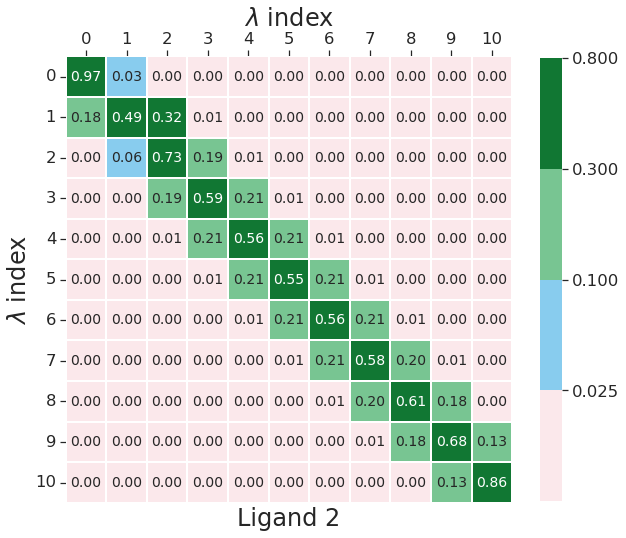

In [37]:
colour_map = matplotlib.colors.ListedColormap(['#FBE8EB','#88CCEE','#78C592', '#117733'])
n_colours = colour_map.N
boundary_values = [0.0, 0.025, 0.1, 0.3, 0.8]
norm_colours = matplotlib.colors.BoundaryNorm(boundary_values, n_colours, clip=False)
colour_bar_args = dict(ticks=[0.025, 0.1, 0.3, 0.8],
                       shrink=0.815)

fig = plt.figure(figsize=(10, 10))
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5)
ax = sns.heatmap(matrix, 
                 annot=True, 
                 fmt=".2f", 
                 linewidths=0.3, 
                 annot_kws={"size": 14}, 
                 square=True, 
                 robust=True, 
                 cmap=colour_map,
                 norm=norm_colours,
                 cbar_kws=colour_bar_args,
                 vmax=1
                 )
ax.xaxis.tick_top()
ax.set_title(r"$\lambda$ index", fontsize=24)
# ax.xaxis.set_label_position("top")
ax.tick_params(axis="y", rotation=360)
ax.set_xlabel("Ligand 2", fontsize=24)
# ax.set_xlabel(r"$\lambda$ index", fontsize=24)
ax.set_ylabel(r"$\lambda$ index", fontsize=24)
# plt.savefig("../../plots/overlap_matrices/om_{ligand}.pdf")
